In [14]:
# imports
import glob
import re
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import scipy.stats


# read progress data from CSV files and store them into lists
csv_files = glob.glob('progress/progress_*.csv')

# Create an empty list to store data from all files
moving_pro = []
pouring_pro = []
spining_pro = []
tlx_pro = []

# Read each CSV file and store the data into a list
for file in csv_files:
    temp = []
    with open(file, 'r') as f:
        for line in f:
            # split line on either a space or a comma
            row = re.split('[ ,]', line.strip())
            temp.append([int(x) for x in row])  # convert strings to integers
    moving_pro.append(temp[0])
    pouring_pro.append( temp[1])
    spining_pro.append(temp[2])
    tlx_pro.append(temp[3])

print(moving_pro)
print(pouring_pro)
print(spining_pro)
print(tlx_pro)


# read preference data from CSV files and store them into lists

csv_files = glob.glob('preference/preference_*.csv')
moving_pre = []
pouring_pre = []
spining_pre = []
tlx_pre = []

# Read each CSV file and store the data into a list
for file in csv_files:
    temp = []
    with open(file, 'r') as f:
        for line in f:
            # split line on either a space or a comma
            row = re.split('[ ,]', line.strip())
            temp.append([int(x) for x in row])  # convert strings to integers
    moving_pre.append(temp[0])
    pouring_pre.append( temp[1])
    spining_pre.append(temp[2])
    tlx_pre.append(temp[3])

print(moving_pre)
print(pouring_pre)
print(spining_pre)
print(tlx_pre)


#np array everything and calculate the delta

moving_pre = np.array(moving_pre)
pouring_pre = np.array(pouring_pre)
spining_pre = np.array(spining_pre)
tlx_pre = np.array(tlx_pre)

moving_pro = np.array(moving_pro)
pouring_pro = np.array(pouring_pro)
spining_pro = np.array(spining_pro)
tlx_pro = np.array(tlx_pro)

delta_moving_pre = []
delta_pouring_pre = []
delta_spining_pre = []

delta_moving_pro = []
delta_pouring_pro = []
delta_spining_pro = []

for i in range(len(moving_pro)):
    temp = [moving_pro[i][0]]
    for j in range(1, len(moving_pro[0])):
        temp.append(moving_pro[i][j] - moving_pro[i][j-1])
    delta_moving_pro.append(temp)

for i in range(len(pouring_pro)):
    temp = [pouring_pro[i][0]]
    for j in range(1, len(pouring_pro[0])):
        temp.append(pouring_pro[i][j] - pouring_pro[i][j-1])
    delta_pouring_pro.append(temp)

for i in range(len(spining_pro)):
    temp = [spining_pro[i][0]]
    for j in range(1, len(spining_pro[0])):
        temp.append(spining_pro[i][j] - spining_pro[i][j-1])
    delta_spining_pro.append(temp)

for i in range(len(moving_pre)):
    temp = [moving_pre[i][0]]
    for j in range(1, len(moving_pre[0])):
        temp.append(moving_pre[i][j] - moving_pre[i][j-1])
    delta_moving_pre.append(temp)

for i in range(len(pouring_pre)):
    temp = [pouring_pre[i][0]]
    for j in range(1, len(pouring_pre[0])):
        temp.append(pouring_pre[i][j] - pouring_pre[i][j-1])
    delta_pouring_pre.append(temp)

for i in range(len(spining_pre)):
    temp = [spining_pre[i][0]]
    for j in range(1, len(spining_pre[0])):
        temp.append(spining_pre[i][j] - spining_pre[i][j-1])
    delta_spining_pre.append(temp)



delta_moving_pre = np.array(delta_moving_pre)
delta_pouring_pre = np.array(delta_pouring_pre)
delta_spining_pre = np.array(delta_spining_pre)



delta_moving_pro = np.array(delta_moving_pro)
delta_pouring_pro = np.array(delta_pouring_pro)
delta_spining_pro = np.array(delta_spining_pro)

print(delta_pouring_pro)


[[90, 80, 85, 90, 95, 97, 100, 100, 100, 100], [25, 28, 32, 33, 34, 36, 45, 48, 55, 64], [10, 15, 20, 45, 70, 75, 80, 87, 93, 100], [30, 30, 35, 45, 60, 70, 80, 85, 90, 92], [30, 40, 55, 60, 75, 90, 95, 100, 100, 100], [20, 30, 20, 40, 35, 40, 40, 80, 90, 92], [30, 30, 40, 40, 60, 70, 80, 80, 85, 85], [15, 15, 15, 15, 60, 60, 70, 80, 90, 90], [20, 25, 45, 55, 70, 75, 80, 90, 95, 96], [35, 25, 30, 45, 55, 60, 70, 90, 95, 80], [25, 30, 30, 35, 45, 40, 33, 60, 75, 95], [1, 4, 1, 58, 76, 83, 85, 88, 95, 100], [5, 5, 10, 15, 20, 25, 30, 35, 35, 30], [10, 15, 23, 26, 42, 55, 61, 66, 71, 74], [24, 25, 35, 40, 55, 60, 70, 85, 90, 95], [35, 30, 40, 50, 70, 95, 98, 99, 99, 100], [30, 25, 22, 33, 44, 55, 66, 79, 88, 88], [25, 30, 40, 60, 75, 80, 85, 92, 96, 97], [10, 15, 25, 30, 50, 70, 75, 90, 95, 96], [20, 30, 40, 50, 60, 70, 75, 80, 90, 90]]
[[40, 40, 60, 70, 75, 80, 85, 90, 97, 100], [25, 30, 35, 45, 50, 65, 75, 90, 99, 100], [25, 25, 60, 85, 90, 93, 94, 95, 99, 100], [30, 40, 70, 90, 95, 98,

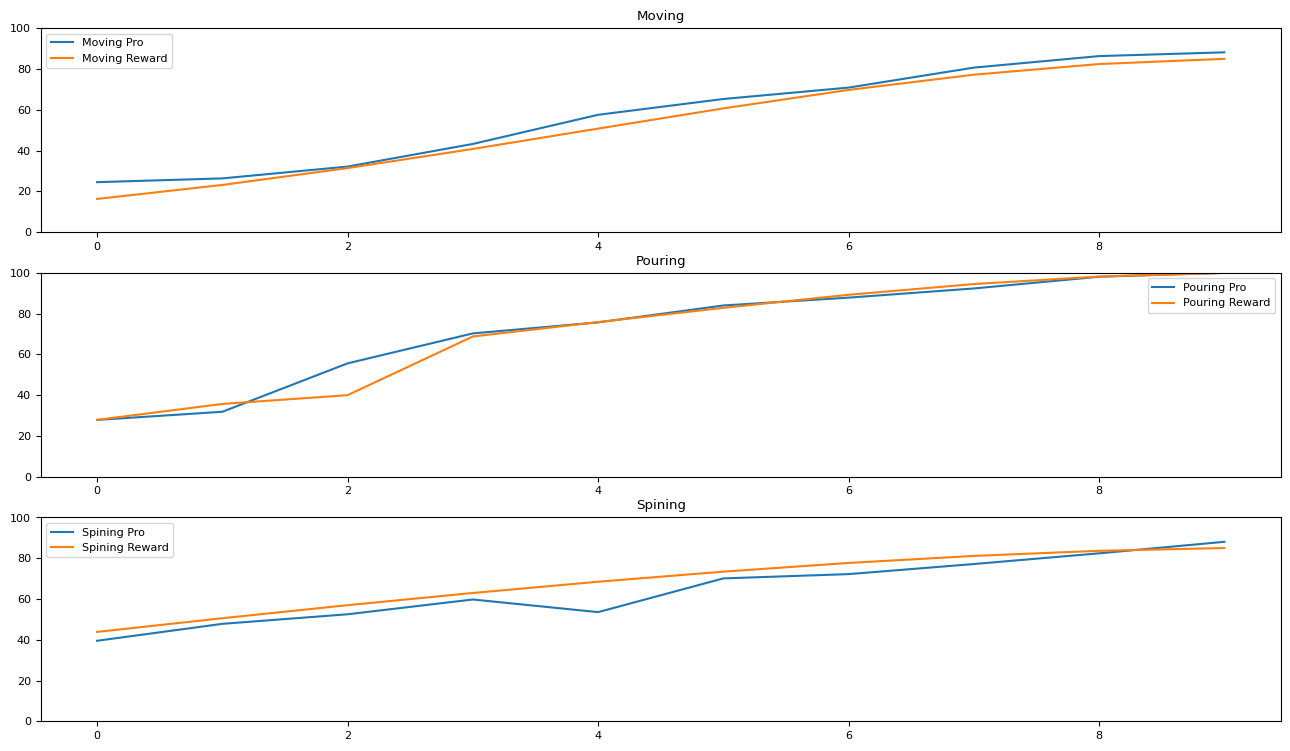

In [15]:
# fit reward function


def reward_function_moving(step, max_step = 10, max_reward = 85, gamma = 0.85):
    discount = 1
    for i in range(step, max_step):
        discount *=  (i / 30 + 0.67)
    return max_reward * discount

def reward_function_pouring(step, max_step = 10, reward1 = 40, reward2 = 60, gamma = 0.8):
    discount = 1
    if step <= 3:
        for i in range(step, 3):
            discount *=  (i / 9 + 0.67)
        return reward1 * discount
    else:
        for i in range(step, max_step):
            discount *=  (i / 30 + 0.67)
        return reward1 + reward2 * discount

def reward_function_spining(step, max_step = 10, max_reward = 100, gamma = 0.84):
    reward = 0
    discount = 0
    for i in range(0, step):
        reward += 8.5
    for i in range(step, max_step):
        discount = gamma *(discount + 8.5)
    reward += discount
    return reward

fig, axs = plt.subplots(3, 1, figsize=(16, 9))

moving_pro_mean = moving_pro.mean(axis=0)
pouring_pro_mean = pouring_pro.mean(axis=0)
spining_pro_mean = spining_pro.mean(axis=0)

reward_moving = [reward_function_moving(i) for i in range(1, 11)]
reward_pouring = [reward_function_pouring(i) for i in range(1, 11)]
reward_spining = [reward_function_spining(i) for i in range(1, 11)]


axs[0].plot(moving_pro_mean, label='Moving Pro')
axs[0].plot(reward_moving, label='Moving Reward')
axs[0].set_title('Moving')
axs[0].set_ylim(0, 100)
axs[0].legend()

axs[1].plot(pouring_pro_mean, label='Pouring Pro')
axs[1].plot(reward_pouring, label='Pouring Reward')
axs[1].set_title('Pouring')
axs[1].set_ylim(0, 100)
axs[1].legend()

axs[2].plot(spining_pro_mean, label='Spining Pro')
axs[2].plot(reward_spining, label='Spining Reward')
axs[2].set_title('Spining')
axs[2].set_ylim(0, 100)
axs[2].legend()

plt.show()



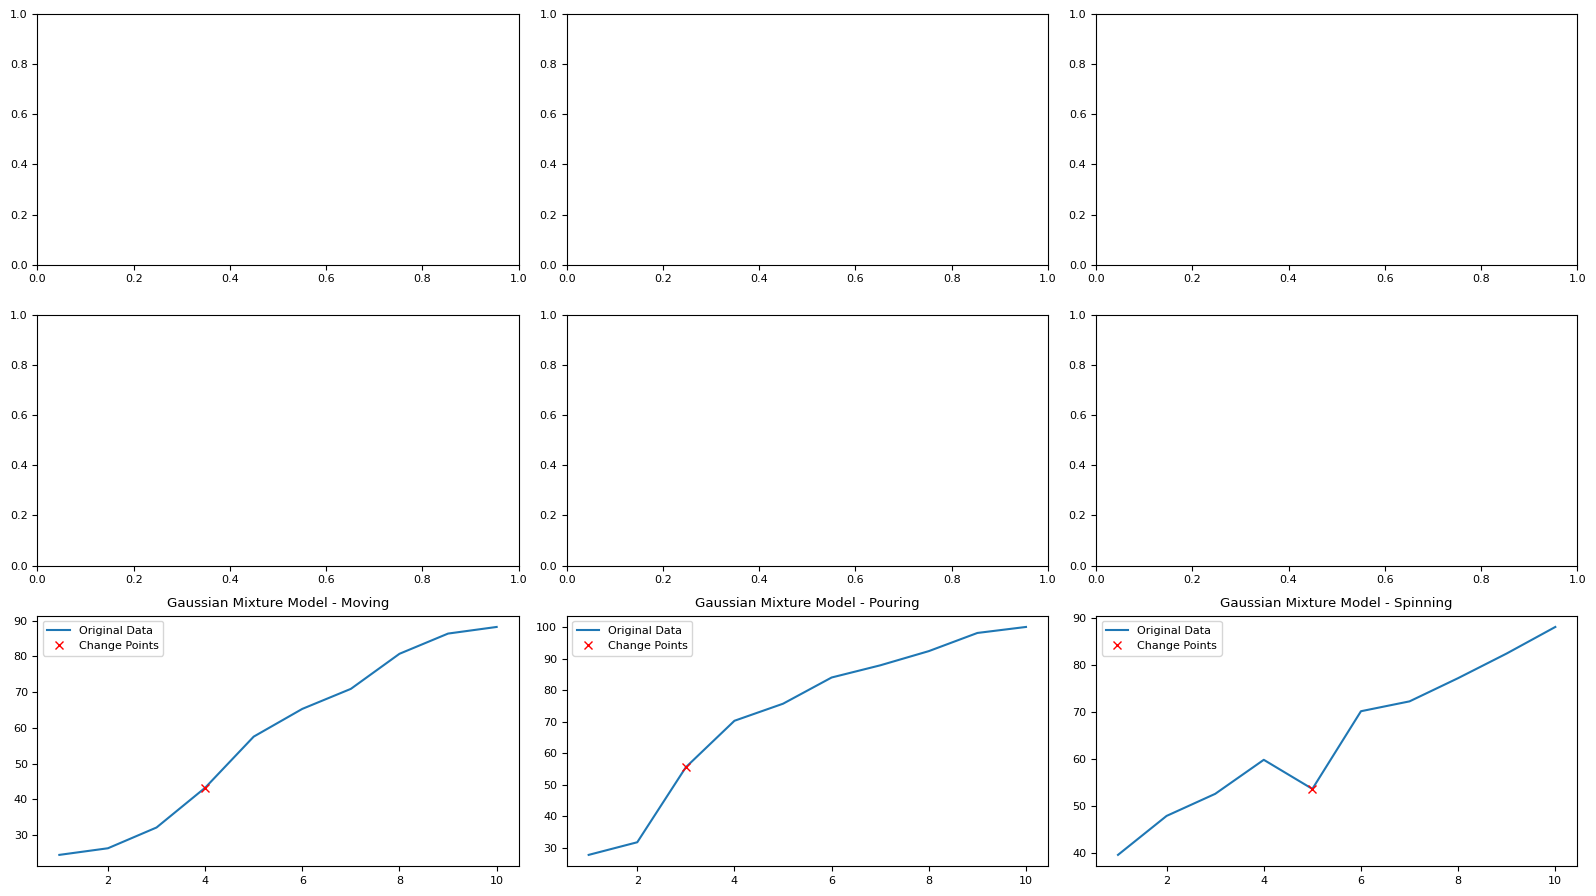

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
from sklearn.mixture import GaussianMixture

# Your data goes here
time_step = np.arange(1, 11)

# Creating a 3x3 subplot for three methods and three datasets
fig, axs = plt.subplots(3, 3, figsize=(16, 9))
datasets = [moving_pro_mean, pouring_pro_mean, spining_pro_mean]
dataset_names = ['Moving', 'Pouring', 'Spinning']



# Gaussian Mixture Model
for i, data in enumerate(datasets):
    gmm = GaussianMixture(n_components=2).fit(data.reshape(-1, 1))
    components = gmm.predict(data.reshape(-1, 1))
    change_points = np.where(np.diff(components))[0]
    axs[2, i].plot(time_step, data, label='Original Data')
    axs[2, i].plot(time_step[change_points], data[change_points], 'rx', label='Change Points')
    axs[2, i].set_title(f'Gaussian Mixture Model - {dataset_names[i]}')
    axs[2, i].legend()

plt.tight_layout()
plt.show()


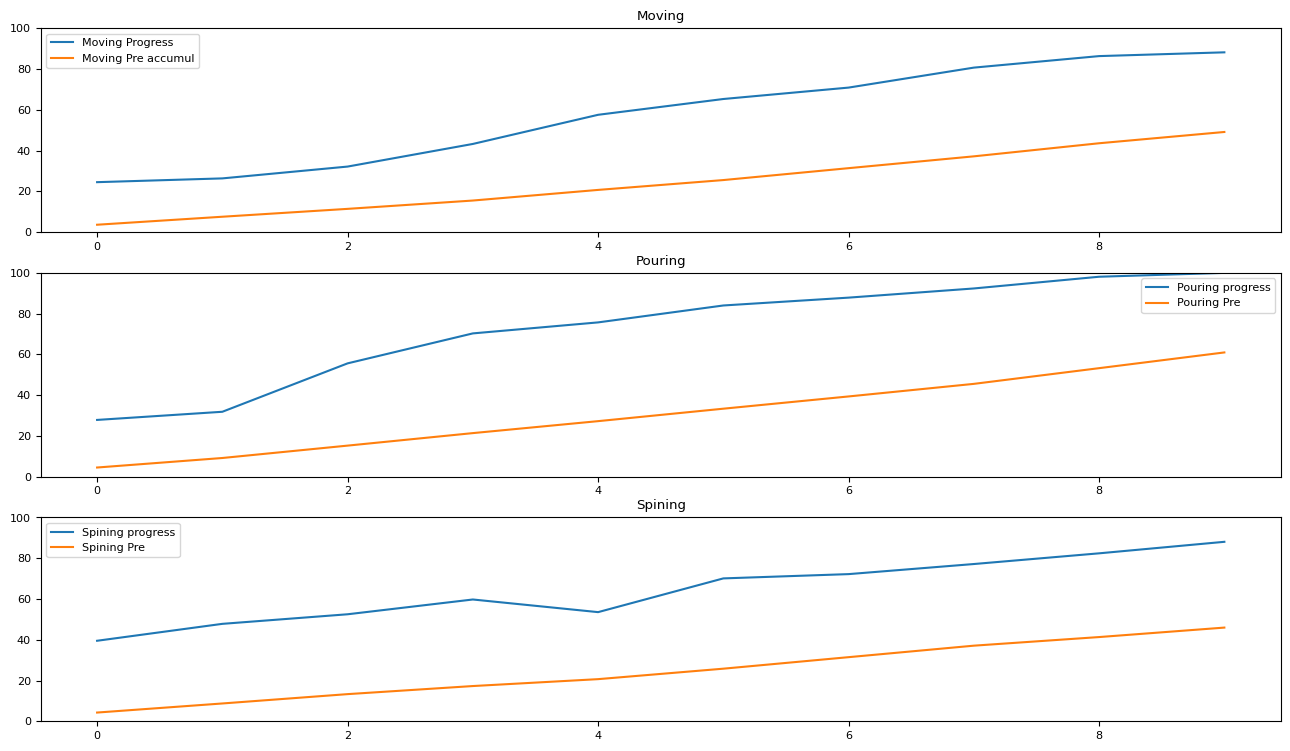

In [17]:
moving_pre_mean = moving_pre.mean(axis=0)
pouring_pre_mean = pouring_pre.mean(axis=0)
spining_pre_mean = spining_pre.mean(axis=0)

moving_pre_accumulate = np.cumsum(moving_pre_mean)/10
pouring_pre_accumulate = np.cumsum(pouring_pre_mean)/10
spining_pre_accumulate = np.cumsum(spining_pre_mean)/10

delta_moving_pro_mean = delta_moving_pro.mean(axis=0)
delta_pouring_pro_mean = delta_pouring_pro.mean(axis=0)
delta_spining_pro_mean = delta_spining_pro.mean(axis=0)



delat_moving_accumulate = np.cumsum(delta_moving_pro_mean)
delta_pouring_accumulate = np.cumsum(delta_pouring_pro_mean)
delta_spining_accumulate = np.cumsum(delta_spining_pro_mean)

moving_pro_mean = moving_pro.mean(axis=0)
pouring_pro_mean = pouring_pro.mean(axis=0)
spining_pro_mean = spining_pro.mean(axis=0)

fig, axs = plt.subplots(3, 1, figsize=(16, 9))

axs[0].plot(moving_pro_mean, label='Moving Progress')
axs[0].plot(moving_pre_accumulate, label='Moving Pre accumul')
axs[0].set_title('Moving')
axs[0].set_ylim(0, 100)
axs[0].legend()

axs[1].plot(pouring_pro_mean, label='Pouring progress')
axs[1].plot(pouring_pre_accumulate, label='Pouring Pre')
axs[1].set_title('Pouring')
axs[1].set_ylim(0, 100)
axs[1].legend()

axs[2].plot(spining_pro_mean, label='Spining progress')
axs[2].plot(spining_pre_accumulate, label='Spining Pre')
axs[2].set_title('Spining')
axs[2].set_ylim(0, 100)
axs[2].legend()


plt.show()


['Mental Demand', 'Physical Demand', 'Temporal Demand', 'Performance', 'Effort', 'Frustration', 'Overall']
[54.5  29.5  25.25 84.5  67.75 28.   48.25]
[48.75 28.75 30.5  86.25 67.   23.75 47.5 ]


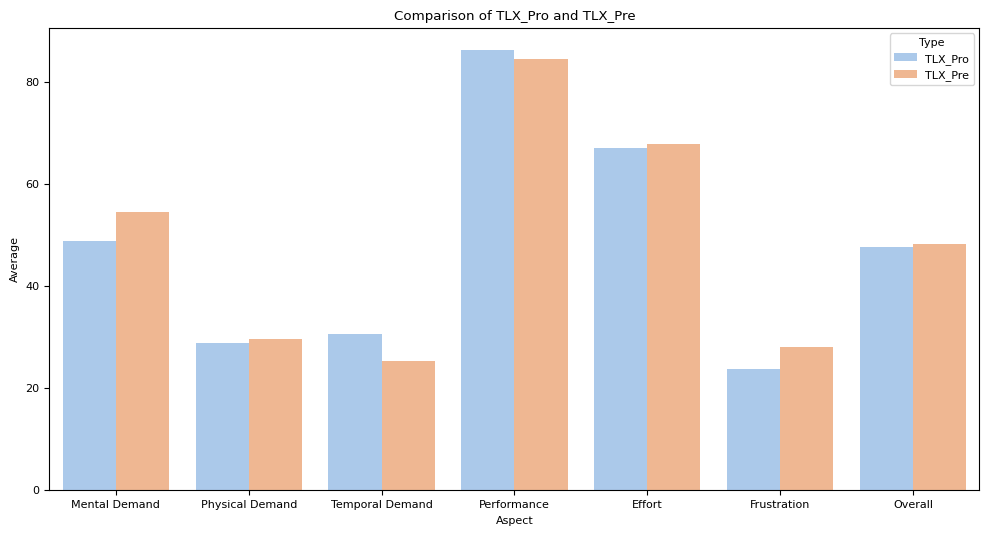

In [18]:
# Define the labels
labels = ['Mental Demand', 'Physical Demand', 'Temporal Demand', 'Performance', 'Effort', 'Frustration', 'Overall']

# Calculate averages of each column
tlx_pro_avg = np.mean(tlx_pro, axis=0)
tlx_pre_avg = np.mean(tlx_pre, axis=0)

# Calculate total averages
tlx_pro_total_avg = np.mean(tlx_pro)
tlx_pre_total_avg = np.mean(tlx_pre)

# Add total averages to the averages of each column
tlx_pro_avg = np.append(tlx_pro_avg, tlx_pro_total_avg)
tlx_pre_avg = np.append(tlx_pre_avg, tlx_pre_total_avg)



print(labels)
print(tlx_pre_avg)
print(tlx_pro_avg)


df = pd.DataFrame({
    'Type': ['TLX_Pro'] * len(tlx_pro_avg) + ['TLX_Pre'] * len(tlx_pre_avg),
    'Average': np.concatenate([tlx_pro_avg, tlx_pre_avg]),
    'Aspect': labels * 2
})


from scipy.stats import ttest_ind

plt.figure(figsize=(12, 6))
sns.barplot(x='Aspect', y='Average', hue='Type', data=df, palette=sns.color_palette("pastel"), capsize=.1)

# Adjust the range of the loop to match the number of columns in your data
for i in range(len(tlx_pro_avg) - 1):  # subtract 1 because the last item is the total average
    _, p_val = ttest_ind(tlx_pro[:, i], tlx_pre[:, i])  # Run independent t-test
    if p_val < 0.1:
        plt.text(i, max(tlx_pro_avg[i], tlx_pre_avg[i]), '*', ha='center')

plt.title('Comparison of TLX_Pro and TLX_Pre')
plt.show()


C:\Users\Hang Yu\AppData\Local\Temp\ipykernel_22540\2523397148.py:97: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


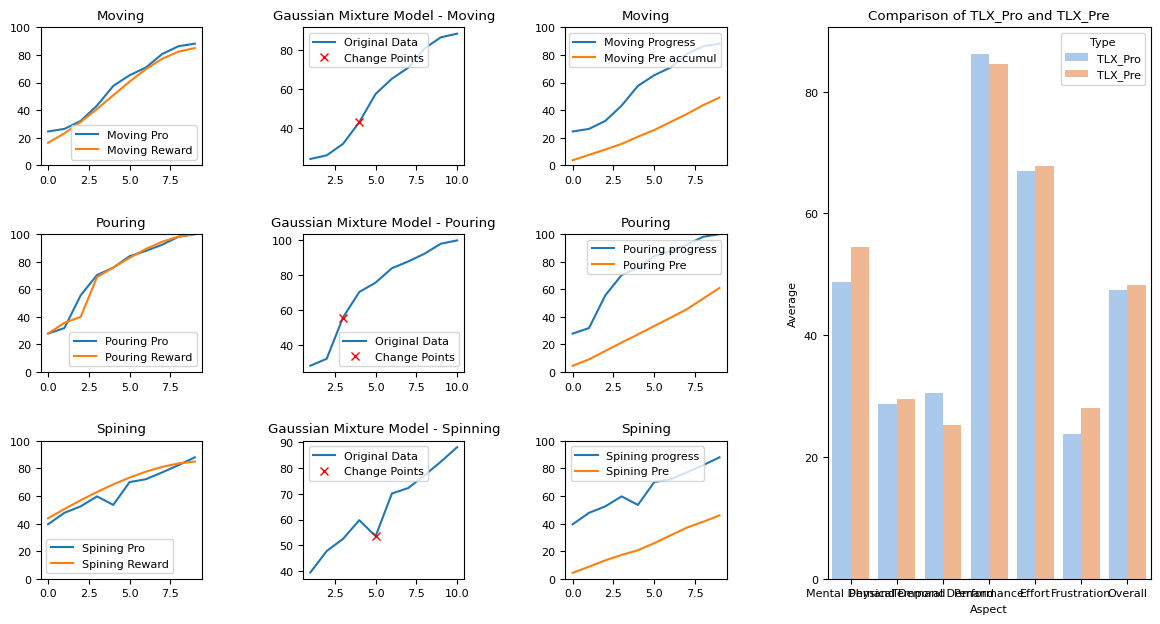

In [19]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
import numpy as np
from sklearn.mixture import GaussianMixture
from scipy.stats import ttest_ind
import pandas as pd

# Define the gridspec
fig_width = 7.16*2  # width in inches, for double column
fig_height = 7.16  # Adjusted height in inches to maintain aspect ratio

fig = plt.figure(figsize=(fig_width, fig_height))
gs = gridspec.GridSpec(3, 4, width_ratios=[1, 1, 1, 2], hspace=0.5, wspace=0.5)

# Font size
font_size = 8
plt.rcParams.update({'font.size': font_size})

# Block 1
ax1 = plt.subplot(gs[0, 0])
ax2 = plt.subplot(gs[1, 0])
ax3 = plt.subplot(gs[2, 0])

ax1.plot(moving_pro_mean, label='Moving Pro')
ax1.plot(reward_moving, label='Moving Reward')
ax1.set_title('Moving')
ax1.set_ylim(0, 100)
ax1.legend()

ax2.plot(pouring_pro_mean, label='Pouring Pro')
ax2.plot(reward_pouring, label='Pouring Reward')
ax2.set_title('Pouring')
ax2.set_ylim(0, 100)
ax2.legend()

ax3.plot(spining_pro_mean, label='Spining Pro')
ax3.plot(reward_spining, label='Spining Reward')
ax3.set_title('Spining')
ax3.set_ylim(0, 100)
ax3.legend()

# Block 2 (Gaussian Mixture Model)
for i, data in enumerate([moving_pro_mean, pouring_pro_mean, spining_pro_mean]):
    ax = plt.subplot(gs[i, 1])
    gmm = GaussianMixture(n_components=2).fit(data.reshape(-1, 1))
    components = gmm.predict(data.reshape(-1, 1))
    change_points = np.where(np.diff(components))[0]
    ax.plot(time_step, data, label='Original Data')
    ax.plot(time_step[change_points], data[change_points], 'rx', label='Change Points')
    ax.set_title(f'Gaussian Mixture Model - {dataset_names[i]}')
    ax.legend()

# Block 3
ax4 = plt.subplot(gs[0, 2])
ax5 = plt.subplot(gs[1, 2])
ax6 = plt.subplot(gs[2, 2])

ax4.plot(moving_pro_mean, label='Moving Progress')
ax4.plot(moving_pre_accumulate, label='Moving Pre accumul')
ax4.set_title('Moving')
ax4.set_ylim(0, 100)
ax4.legend()

ax5.plot(pouring_pro_mean, label='Pouring progress')
ax5.plot(pouring_pre_accumulate, label='Pouring Pre')
ax5.set_title('Pouring')
ax5.set_ylim(0, 100)
ax5.legend()

ax6.plot(spining_pro_mean, label='Spining progress')
ax6.plot(spining_pre_accumulate, label='Spining Pre')
ax6.set_title('Spining')
ax6.set_ylim(0, 100)
ax6.legend()

# Block 4
ax7 = plt.subplot(gs[:, 3])

df = pd.DataFrame({
    'Type': ['TLX_Pro'] * len(tlx_pro_avg) + ['TLX_Pre'] * len(tlx_pre_avg),
    'Average': np.concatenate([tlx_pro_avg, tlx_pre_avg]),
    'Aspect': labels * 2
})

sns.barplot(x='Aspect', y='Average', hue='Type', data=df, ax=ax7,
            palette=sns.color_palette("pastel"), capsize=.1)

# Adjust the range of the loop to match the number of columns in your data
for i in range(len(tlx_pro_avg) - 1):  # subtract 1 because the last item is the total average
    _, p_val = ttest_ind(tlx_pro[:, i], tlx_pre[:, i])  # Run independent t-test
    if p_val < 0.1:
        ax7.text(i, max(tlx_pro_avg[i], tlx_pre_avg[i]), '*', ha='center')

ax7.set_title('Comparison of TLX_Pro and TLX_Pre')

plt.tight_layout()
plt.savefig("plot_high_res.png", dpi=300, bbox_inches='tight')
plt.show()


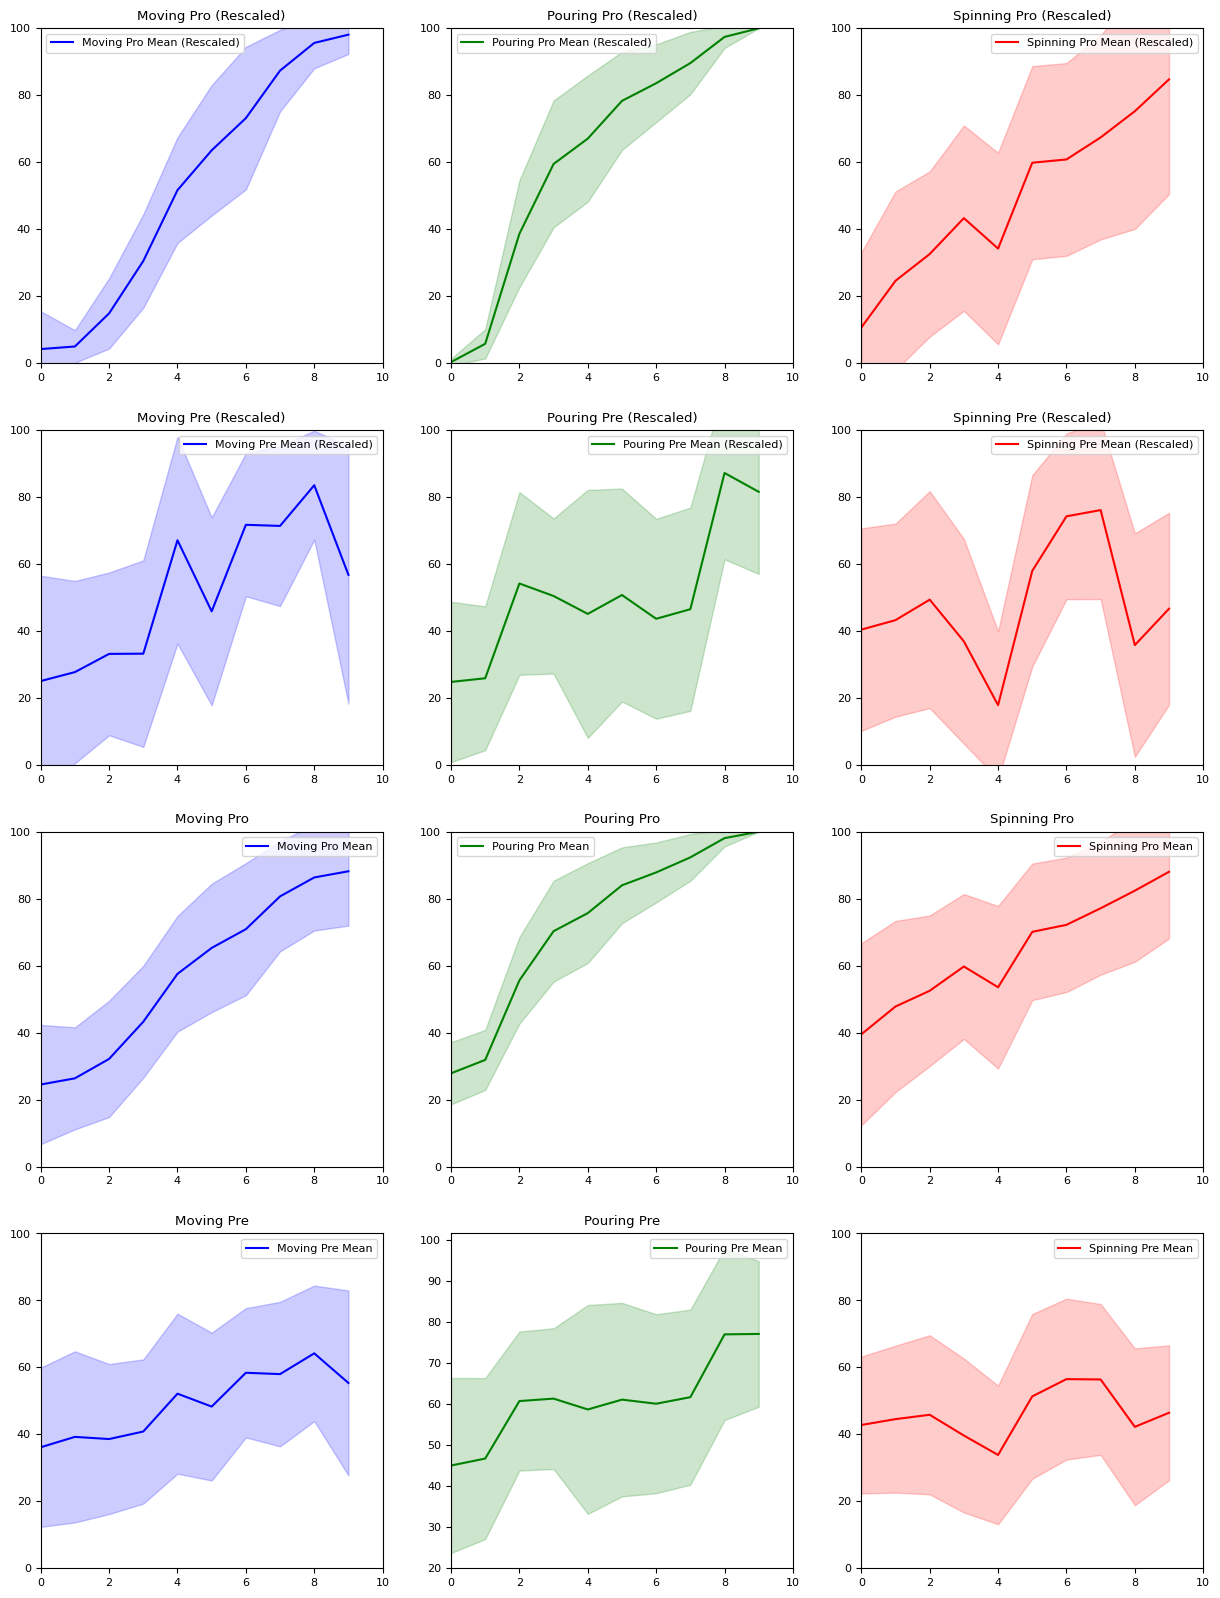

In [20]:
import matplotlib.pyplot as plt
import numpy as np

def rescale_to_range(data, new_min=0, new_max=100):
    old_min = min(data)
    old_max = max(data)
    
    if old_max == old_min:
        return [new_min] * len(data)
    
    return [(new_min + (x - old_min) * (new_max - new_min) / (old_max - old_min)) for x in data]

# Rescaling the individual datasets for pro data
moving_pro_rescaled = np.array([rescale_to_range(moving_pro[i]) for i in range(20)])
pouring_pro_rescaled = np.array([rescale_to_range(pouring_pro[i]) for i in range(20)])
spining_pro_rescaled = np.array([rescale_to_range(spining_pro[i]) for i in range(20)])

# Rescaling the individual datasets for pre data
moving_pre_rescaled = np.array([rescale_to_range(moving_pre[i]) for i in range(20)])
pouring_pre_rescaled = np.array([rescale_to_range(pouring_pre[i]) for i in range(20)])
spining_pre_rescaled = np.array([rescale_to_range(spining_pre[i]) for i in range(20)])

# Calculate the means and standard deviations for each x-value for rescaled pro data
moving_pro_means_rescaled = np.mean(moving_pro_rescaled, axis=0)
moving_pro_stds_rescaled = np.std(moving_pro_rescaled, axis=0)

pouring_pro_means_rescaled = np.mean(pouring_pro_rescaled, axis=0)
pouring_pro_stds_rescaled = np.std(pouring_pro_rescaled, axis=0)

spining_pro_means_rescaled = np.mean(spining_pro_rescaled, axis=0)
spining_pro_stds_rescaled = np.std(spining_pro_rescaled, axis=0)

# Calculate the means and standard deviations for each x-value for rescaled pre data
moving_pre_means_rescaled = np.mean(moving_pre_rescaled, axis=0)
moving_pre_stds_rescaled = np.std(moving_pre_rescaled, axis=0)

pouring_pre_means_rescaled = np.mean(pouring_pre_rescaled, axis=0)
pouring_pre_stds_rescaled = np.std(pouring_pre_rescaled, axis=0)

spining_pre_means_rescaled = np.mean(spining_pre_rescaled, axis=0)
spining_pre_stds_rescaled = np.std(spining_pre_rescaled, axis=0)

# Calculate the means and standard deviations for each x-value for unrescaled pro data
moving_pro_means = np.mean(np.array(moving_pro), axis=0)
moving_pro_stds = np.std(np.array(moving_pro), axis=0)

pouring_pro_means = np.mean(np.array(pouring_pro), axis=0)
pouring_pro_stds = np.std(np.array(pouring_pro), axis=0)

spining_pro_means = np.mean(np.array(spining_pro), axis=0)
spining_pro_stds = np.std(np.array(spining_pro), axis=0)

# Calculate the means and standard deviations for each x-value for unrescaled pre data
moving_pre_means = np.mean(np.array(moving_pre), axis=0)
moving_pre_stds = np.std(np.array(moving_pre), axis=0)

pouring_pre_means = np.mean(np.array(pouring_pre), axis=0)
pouring_pre_stds = np.std(np.array(pouring_pre), axis=0)

spining_pre_means = np.mean(np.array(spining_pre), axis=0)
spining_pre_stds = np.std(np.array(spining_pre), axis=0)

delta_moving_pre_std = np.std(delta_moving_pre, axis=0)
delta_pouring_pre_std = np.std(delta_pouring_pre, axis=0)
delta_spining_pre_std = np.std(delta_spining_pre, axis=0)

delta_moving_pro_std = np.std(delta_moving_pro, axis=0)
delta_pouring_pro_std = np.std(delta_pouring_pro, axis=0)
delta_spining_pro_std = np.std(delta_spining_pro, axis=0)



# Plotting the data in a 4x3 subplot
fig, axes = plt.subplots(4, 3, figsize=(15, 20))

# Plotting Rescaled Moving Pro
axes[0, 0].plot(moving_pro_means_rescaled, color='blue', label='Moving Pro Mean (Rescaled)')
axes[0, 0].fill_between(range(len(moving_pro_means_rescaled)), moving_pro_means_rescaled - moving_pro_stds_rescaled, moving_pro_means_rescaled + moving_pro_stds_rescaled, color='blue', alpha=0.2)
axes[0, 0].set_title('Moving Pro (Rescaled)')
axes[0, 0].legend()
axes[0,0].set_xlim(0, 10)
axes[0,0].set_ylim(0, 100)

# Plotting Rescaled Moving Pre
axes[1, 0].plot(moving_pre_means_rescaled, color='blue', label='Moving Pre Mean (Rescaled)')
axes[1, 0].fill_between(range(len(moving_pre_means_rescaled)), moving_pre_means_rescaled - moving_pre_stds_rescaled, moving_pre_means_rescaled + moving_pre_stds_rescaled, color='blue', alpha=0.2)
axes[1, 0].set_title('Moving Pre (Rescaled)')
axes[1, 0].legend()
axes[1,0].set_xlim(0, 10)
axes[1,0].set_ylim(0, 100)

# Plotting Unrescaled Moving Pro
axes[2, 0].plot(moving_pro_means, color='blue', label='Moving Pro Mean')
axes[2, 0].fill_between(range(len(moving_pro_means)), moving_pro_means - moving_pro_stds, moving_pro_means + moving_pro_stds, color='blue', alpha=0.2)
axes[2, 0].set_title('Moving Pro')
axes[2, 0].legend()
axes[2,0].set_xlim(0, 10)
axes[2,0].set_ylim(0, 100)

# Plotting Unrescaled Moving Pre
axes[3, 0].plot(moving_pre_means, color='blue', label='Moving Pre Mean')
axes[3, 0].fill_between(range(len(moving_pre_means)), moving_pre_means - moving_pre_stds, moving_pre_means + moving_pre_stds, color='blue', alpha=0.2)
axes[3, 0].set_title('Moving Pre')
axes[3, 0].legend()
axes[3,0].set_xlim(0, 10)
axes[3,0].set_ylim(0, 100)

# Plotting Rescaled Pouring Pro
axes[0, 1].plot(pouring_pro_means_rescaled, color='green', label='Pouring Pro Mean (Rescaled)')
axes[0, 1].fill_between(range(len(pouring_pro_means_rescaled)), pouring_pro_means_rescaled - pouring_pro_stds_rescaled, pouring_pro_means_rescaled + pouring_pro_stds_rescaled, color='green', alpha=0.2)
axes[0, 1].set_title('Pouring Pro (Rescaled)')
axes[0, 1].legend()
axes[0,1].set_xlim(0, 10)
axes[0,1].set_ylim(0, 100)

# Plotting Rescaled Pouring Pre
axes[1, 1].plot(pouring_pre_means_rescaled, color='green', label='Pouring Pre Mean (Rescaled)')
axes[1, 1].fill_between(range(len(pouring_pre_means_rescaled)), pouring_pre_means_rescaled - pouring_pre_stds_rescaled, pouring_pre_means_rescaled + pouring_pre_stds_rescaled, color='green', alpha=0.2)
axes[1, 1].set_title('Pouring Pre (Rescaled)')
axes[1, 1].legend()
axes[1,1].set_xlim(0, 10)
axes[1,1].set_ylim(0, 100)

# Plotting Unrescaled Pouring Pro
axes[2, 1].plot(pouring_pro_means, color='green', label='Pouring Pro Mean')
axes[2, 1].fill_between(range(len(pouring_pro_means)), pouring_pro_means - pouring_pro_stds, pouring_pro_means + pouring_pro_stds, color='green', alpha=0.2)
axes[2, 1].set_title('Pouring Pro')
axes[2, 1].legend()
axes[2,1].set_xlim(0, 10)
axes[2,1].set_ylim(0, 100)

# Plotting Unrescaled Pouring Pre
axes[3, 1].plot(pouring_pre_means, color='green', label='Pouring Pre Mean')
axes[3, 1].fill_between(range(len(pouring_pre_means)), pouring_pre_means - pouring_pre_stds, pouring_pre_means + pouring_pre_stds, color='green', alpha=0.2)
axes[3, 1].set_title('Pouring Pre')
axes[3, 1].legend()
axes[3,1].set_xlim(0, 10)


# Plotting Rescaled Spinning Pro
axes[0, 2].plot(spining_pro_means_rescaled, color='red', label='Spinning Pro Mean (Rescaled)')
axes[0, 2].fill_between(range(len(spining_pro_means_rescaled)), spining_pro_means_rescaled - spining_pro_stds_rescaled, spining_pro_means_rescaled + spining_pro_stds_rescaled, color='red', alpha=0.2)
axes[0, 2].set_title('Spinning Pro (Rescaled)')
axes[0, 2].legend()
axes[0,2].set_xlim(0, 10)
axes[0,2].set_ylim(0, 100)

# Plotting Rescaled Spinning Pre
axes[1, 2].plot(spining_pre_means_rescaled, color='red', label='Spinning Pre Mean (Rescaled)')
axes[1, 2].fill_between(range(len(spining_pre_means_rescaled)), spining_pre_means_rescaled - spining_pre_stds_rescaled, spining_pre_means_rescaled + spining_pre_stds_rescaled, color='red', alpha=0.2)
axes[1, 2].set_title('Spinning Pre (Rescaled)')
axes[1, 2].legend()
axes[1,2].set_xlim(0, 10)
axes[1,2].set_ylim(0, 100)

# Plotting Unrescaled Spinning Pro
axes[2, 2].plot(spining_pro_means, color='red', label='Spinning Pro Mean')
axes[2, 2].fill_between(range(len(spining_pro_means)), spining_pro_means - spining_pro_stds, spining_pro_means + spining_pro_stds, color='red', alpha=0.2)
axes[2, 2].set_title('Spinning Pro')
axes[2, 2].legend()
axes[2,2].set_xlim(0, 10)
axes[2,2].set_ylim(0, 100)


# Plotting Unrescaled Spinning Pre
axes[3, 2].plot(spining_pre_means, color='red', label='Spinning Pre Mean')
axes[3, 2].fill_between(range(len(spining_pre_means)), spining_pre_means - spining_pre_stds, spining_pre_means + spining_pre_stds, color='red', alpha=0.2)
axes[3, 2].legend()
axes[3,2].set_xlim(0, 10)
axes[3,2].set_ylim(0, 100)

plt.xlim(0, 10)
plt.ylim(0, 100)
# Show plot
plt.show()



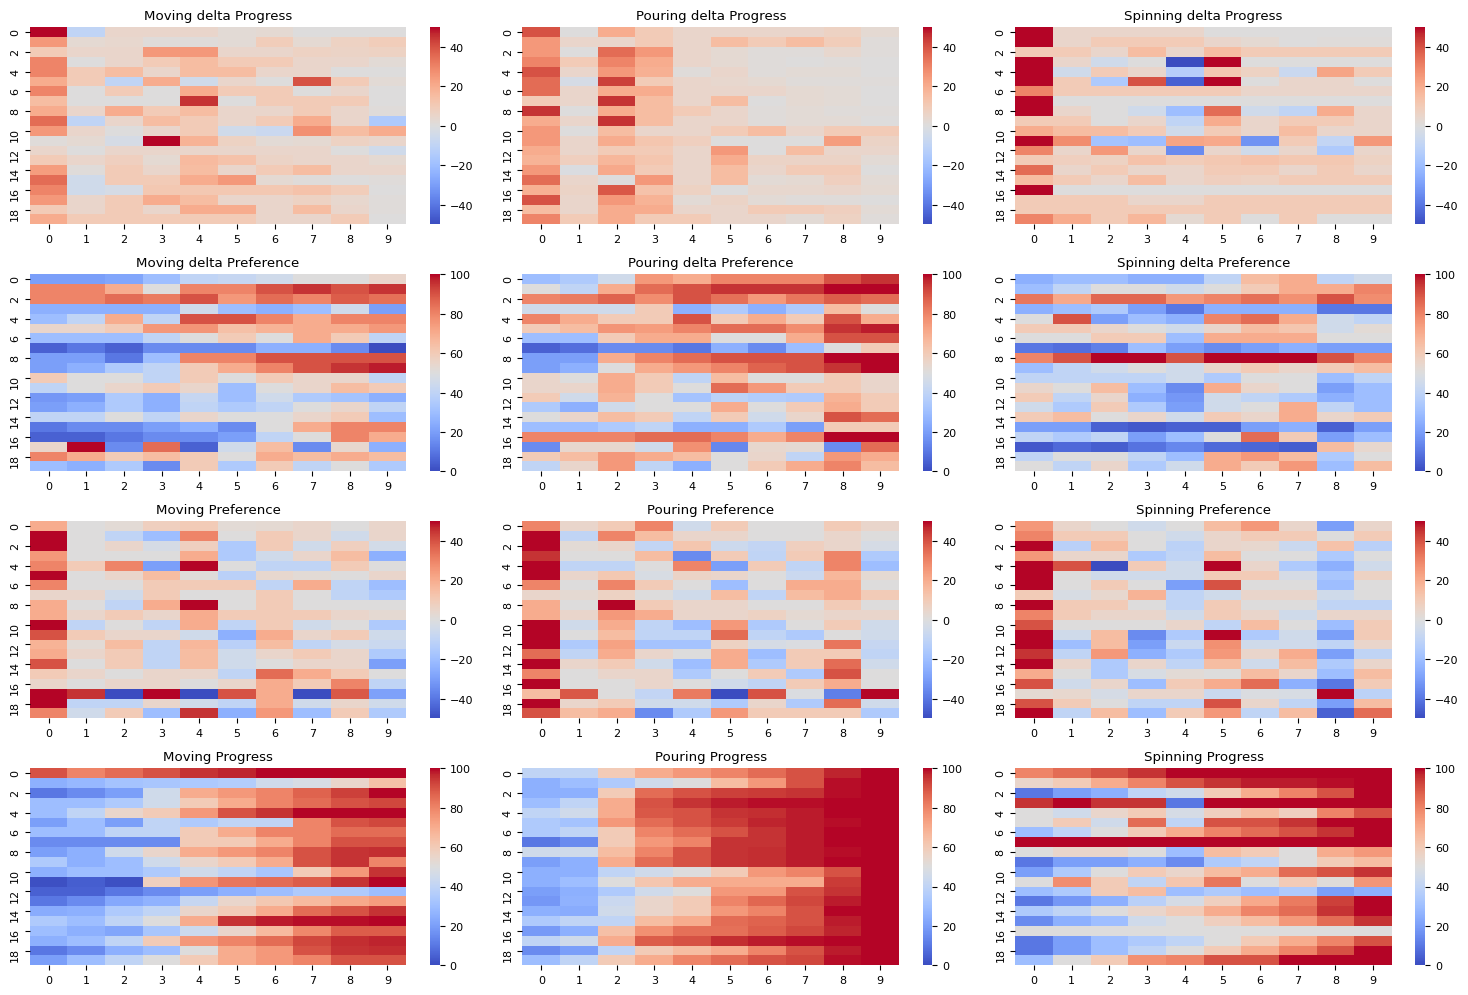

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Dummy data

pro_data = [
    moving_pro,
    pouring_pro,
    spining_pro
]

pre_data = [
    moving_pre,
    pouring_pre,
    spining_pre
]

delta_pro_data = [
    delta_moving_pro,
    delta_pouring_pro,
    delta_spining_pro
]

delta_pre_data = [
    delta_moving_pre,
    delta_pouring_pre,
    delta_spining_pre
]

# Create figure
fig, axes = plt.subplots(4, 3, figsize=(15, 10))

# Swapping positions: Plotting delta_pro_data first (was plot 3)
for i, data in enumerate(delta_pro_data):
    sns.heatmap(data, ax=axes[0, i], cmap="coolwarm", cbar=True, vmin= -50, vmax=50)
axes[0, 0].set_title('Moving delta Progress')
axes[0, 1].set_title('Pouring delta Progress')
axes[0, 2].set_title('Spinning delta Progress')

# Plotting pre_data second (was plot 1)
for i, data in enumerate(pre_data):
    sns.heatmap(data, ax=axes[1, i], cmap="coolwarm", cbar=True, vmin=0, vmax=100)
axes[2, 0].set_title('Moving Preference')
axes[2, 1].set_title('Pouring Preference')
axes[2, 2].set_title('Spinning Preference')

# Keeping delta_pre_data at position 3
for i, data in enumerate(delta_pre_data):
    sns.heatmap(data, ax=axes[2, i], cmap="coolwarm", cbar=True, vmin=-50, vmax=50)
axes[1, 0].set_title('Moving delta Preference')
axes[1, 1].set_title('Pouring delta Preference')
axes[1, 2].set_title('Spinning delta Preference')

# Keeping pro_data at position 4
for i, data in enumerate(pro_data):
    sns.heatmap(data, ax=axes[3, i], cmap="coolwarm", cbar=True, vmin= 0, vmax=100)
axes[3, 0].set_title('Moving Progress')
axes[3, 1].set_title('Pouring Progress')
axes[3, 2].set_title('Spinning Progress')

plt.tight_layout()
plt.show()


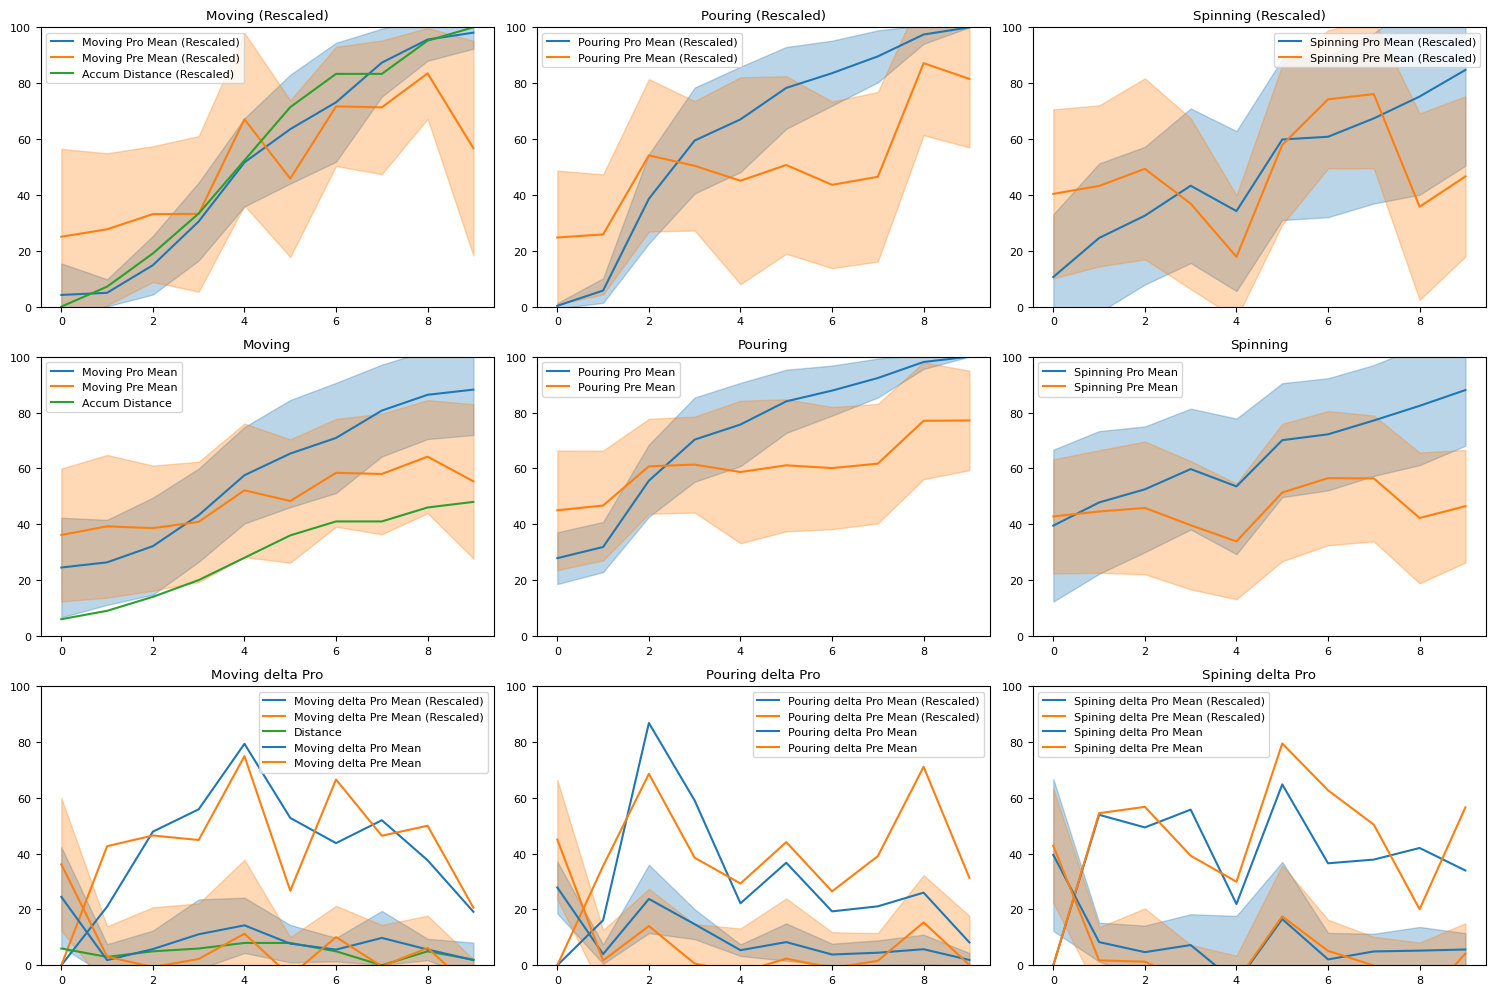

In [22]:
import matplotlib.colors as mcolors

distance = [np.random.randint(0, 10) for _ in range(10)]
cum_distance = np.cumsum(distance)
cum_distance_rescaled = rescale_to_range(cum_distance)

# Fancy colors for lines
colors = list(mcolors.TABLEAU_COLORS.keys())
a = delta_moving_pro_mean

fig, axes = plt.subplots(3, 3, figsize=(15, 10))

delta_moving_pre_mean = np.mean(delta_moving_pre, axis=0)
delta_pouring_pre_mean = np.mean(delta_pouring_pre, axis=0)
delta_spining_pre_mean = np.mean(delta_spining_pre, axis=0)

delta_moving_pro_means_rescaled = np.array([rescale_to_range(delta_moving_pro[i][1:]) for i in range(20)])
delta_pouring_pro_means_rescaled = np.array([rescale_to_range(delta_pouring_pro[i][1:]) for i in range(20)])
delta_spining_pro_means_rescaled = np.array([rescale_to_range(delta_spining_pro[i][1:]) for i in range(20)])

delta_moving_pro_means_rescaled = np.mean(delta_moving_pro_means_rescaled, axis=0)
delta_pouring_pro_means_rescaled = np.mean(delta_pouring_pro_means_rescaled, axis=0)
delta_spining_pro_means_rescaled = np.mean(delta_spining_pro_means_rescaled, axis=0)

delta_moving_pro_means_rescaled = np.insert(delta_moving_pro_means_rescaled, 0, 0)
delta_pouring_pro_means_rescaled = np.insert(delta_pouring_pro_means_rescaled, 0, 0)
delta_spining_pro_means_rescaled = np.insert(delta_spining_pro_means_rescaled, 0, 0)

delta_moving_pre_means_rescaled = np.array([rescale_to_range(delta_moving_pre[i][1:]) for i in range(20)])
delta_pouring_pre_means_rescaled = np.array([rescale_to_range(delta_pouring_pre[i][1:]) for i in range(20)])
delta_spining_pre_means_rescaled = np.array([rescale_to_range(delta_spining_pre[i][1:]) for i in range(20)])

delta_moving_pre_means_rescaled = np.mean(delta_moving_pre_means_rescaled, axis=0)
delta_pouring_pre_means_rescaled = np.mean(delta_pouring_pre_means_rescaled, axis=0)
delta_spining_pre_means_rescaled = np.mean(delta_spining_pre_means_rescaled, axis=0)

delta_moving_pre_means_rescaled = np.insert(delta_moving_pre_means_rescaled, 0, 0)
delta_pouring_pre_means_rescaled = np.insert(delta_pouring_pre_means_rescaled, 0, 0)
delta_spining_pre_means_rescaled = np.insert(delta_spining_pre_means_rescaled, 0, 0)




# Rescaled Moving
axes[0, 0].plot(moving_pro_means_rescaled, color=colors[0], label='Moving Pro Mean (Rescaled)')
axes[0, 0].plot(moving_pre_means_rescaled, color=colors[1], label='Moving Pre Mean (Rescaled)')
axes[0, 0].plot(cum_distance_rescaled, color=colors[2], label='Accum Distance (Rescaled)')
axes[0, 0].fill_between(range(len(moving_pro_means_rescaled)), moving_pro_means_rescaled - moving_pro_stds_rescaled, moving_pro_means_rescaled + moving_pro_stds_rescaled, color=colors[0], alpha=0.3)
axes[0, 0].fill_between(range(len(moving_pre_means_rescaled)), moving_pre_means_rescaled - moving_pre_stds_rescaled, moving_pre_means_rescaled + moving_pre_stds_rescaled, color=colors[1], alpha=0.3)
axes[0, 0].set_title('Moving (Rescaled)')
axes[0, 0].legend()

# Non-Rescaled Moving
axes[1, 0].plot(moving_pro_means, color=colors[0], label='Moving Pro Mean')
axes[1, 0].plot(moving_pre_means, color=colors[1], label='Moving Pre Mean')
axes[1, 0].plot(cum_distance, color=colors[2], label='Accum Distance')
axes[1, 0].fill_between(range(len(moving_pro_means)), moving_pro_means - moving_pro_stds, moving_pro_means + moving_pro_stds, color=colors[0], alpha=0.3)
axes[1, 0].fill_between(range(len(moving_pre_means)), moving_pre_means - moving_pre_stds, moving_pre_means + moving_pre_stds, color=colors[1], alpha=0.3)
axes[1, 0].set_title('Moving')
axes[1, 0].legend()

# Rescaled Pouring
axes[0, 1].plot(pouring_pro_means_rescaled, color=colors[0], label='Pouring Pro Mean (Rescaled)')
axes[0, 1].plot(pouring_pre_means_rescaled, color=colors[1], label='Pouring Pre Mean (Rescaled)')
axes[0, 1].fill_between(range(len(pouring_pro_means_rescaled)), pouring_pro_means_rescaled - pouring_pro_stds_rescaled, pouring_pro_means_rescaled + pouring_pro_stds_rescaled, color=colors[0], alpha=0.3)
axes[0, 1].fill_between(range(len(pouring_pre_means_rescaled)), pouring_pre_means_rescaled - pouring_pre_stds_rescaled, pouring_pre_means_rescaled + pouring_pre_stds_rescaled, color=colors[1], alpha=0.3)
axes[0, 1].set_title('Pouring (Rescaled)')
axes[0, 1].legend()

# Non-Rescaled Pouring
axes[1, 1].plot(pouring_pro_means, color=colors[0], label='Pouring Pro Mean')
axes[1, 1].plot(pouring_pre_means, color=colors[1], label='Pouring Pre Mean')
axes[1, 1].fill_between(range(len(pouring_pro_means)), pouring_pro_means - pouring_pro_stds, pouring_pro_means + pouring_pro_stds, color=colors[0], alpha=0.3)
axes[1, 1].fill_between(range(len(pouring_pre_means)), pouring_pre_means - pouring_pre_stds, pouring_pre_means + pouring_pre_stds, color=colors[1], alpha=0.3)
axes[1, 1].set_title('Pouring')
axes[1, 1].legend()

# Rescaled Spinning
axes[0, 2].plot(spining_pro_means_rescaled, color=colors[0], label='Spinning Pro Mean (Rescaled)')
axes[0, 2].plot(spining_pre_means_rescaled, color=colors[1], label='Spinning Pre Mean (Rescaled)')
axes[0, 2].fill_between(range(len(spining_pro_means_rescaled)), spining_pro_means_rescaled - spining_pro_stds_rescaled, spining_pro_means_rescaled + spining_pro_stds_rescaled, color=colors[0], alpha=0.3)
axes[0, 2].fill_between(range(len(spining_pre_means_rescaled)), spining_pre_means_rescaled - spining_pre_stds_rescaled, spining_pre_means_rescaled + spining_pre_stds_rescaled, color=colors[1], alpha=0.3)
axes[0, 2].set_title('Spinning (Rescaled)')
axes[0, 2].legend()

# Non-Rescaled Spinning
axes[1, 2].plot(spining_pro_means, color=colors[0], label='Spinning Pro Mean')
axes[1, 2].plot(spining_pre_means, color=colors[1], label='Spinning Pre Mean')
axes[1, 2].fill_between(range(len(spining_pro_means)), spining_pro_means - spining_pro_stds, spining_pro_means + spining_pro_stds, color=colors[0], alpha=0.3)
axes[1, 2].fill_between(range(len(spining_pre_means)), spining_pre_means - spining_pre_stds, spining_pre_means + spining_pre_stds, color=colors[1], alpha=0.3)
axes[1, 2].set_title('Spinning')
axes[1, 2].legend()


axes[2, 0].plot(delta_moving_pro_means_rescaled, color=colors[0], label='Moving delta Pro Mean (Rescaled)')
axes[2, 0].plot(delta_moving_pre_means_rescaled, color=colors[1], label='Moving delta Pre Mean (Rescaled)')
axes[2, 0].plot(distance, color=colors[2], label='Distance')
axes[2, 0].plot(delta_moving_pro_mean, color=colors[0], label='Moving delta Pro Mean')
axes[2, 0].plot(delta_moving_pre_mean, color=colors[1], label='Moving delta Pre Mean')
axes[2, 0].fill_between(range(len(delta_moving_pro_mean)), delta_moving_pro_mean - delta_moving_pro_std, delta_moving_pro_mean + delta_moving_pro_std, color=colors[0], alpha=0.3)
axes[2,0].fill_between(range(len(delta_moving_pre_mean)), delta_moving_pre_mean - delta_moving_pre_std, delta_moving_pre_mean + delta_moving_pre_std, color=colors[1], alpha=0.3)
axes[2, 0].set_title('Moving delta Pro')
axes[2, 0].legend()

axes[2, 1].plot(delta_pouring_pro_means_rescaled, color=colors[0], label='Pouring delta Pro Mean (Rescaled)')
axes[2, 1].plot(delta_pouring_pre_means_rescaled, color=colors[1], label='Pouring delta Pre Mean (Rescaled)')
axes[2, 1].plot(delta_pouring_pro_mean, color=colors[0], label='Pouring delta Pro Mean')
axes[2, 1].plot(delta_pouring_pre_mean, color=colors[1], label='Pouring delta Pre Mean')
axes[2, 1].fill_between(range(len(delta_pouring_pro_mean)), delta_pouring_pro_mean - delta_pouring_pro_std, delta_pouring_pro_mean + delta_pouring_pro_std, color=colors[0], alpha=0.3)
axes[2, 1].fill_between(range(len(delta_pouring_pre_mean)), delta_pouring_pre_mean - delta_pouring_pre_std, delta_pouring_pre_mean + delta_pouring_pre_std, color=colors[1], alpha=0.3)
axes[2, 1].set_title('Pouring delta Pro')
axes[2, 1].legend()

axes[2, 2].plot(delta_spining_pro_means_rescaled, color=colors[0], label='Spining delta Pro Mean (Rescaled)')
axes[2, 2].plot(delta_spining_pre_means_rescaled, color=colors[1], label='Spining delta Pre Mean (Rescaled)')
axes[2, 2].plot(delta_spining_pro_mean, color=colors[0], label='Spining delta Pro Mean')
axes[2, 2].plot(delta_spining_pre_mean, color=colors[1], label='Spining delta Pre Mean')
axes[2, 2].fill_between(range(len(delta_spining_pro_mean)), delta_spining_pro_mean - delta_spining_pro_std, delta_spining_pro_mean + delta_spining_pro_std, color=colors[0], alpha=0.3)
axes[2, 2].fill_between(range(len(delta_spining_pre_mean)), delta_spining_pre_mean - delta_spining_pre_std, delta_spining_pre_mean + delta_spining_pre_std, color=colors[1], alpha=0.3)
axes[2, 2].set_title('Spining delta Pro')
axes[2, 2].legend()

for i in range(3):
    for j in range(3):
        axes[i, j].set_ylim(0, 100)

plt.tight_layout()
plt.show()

C:\Users\Hang Yu\AppData\Local\Temp\ipykernel_22540\4138219199.py:91: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


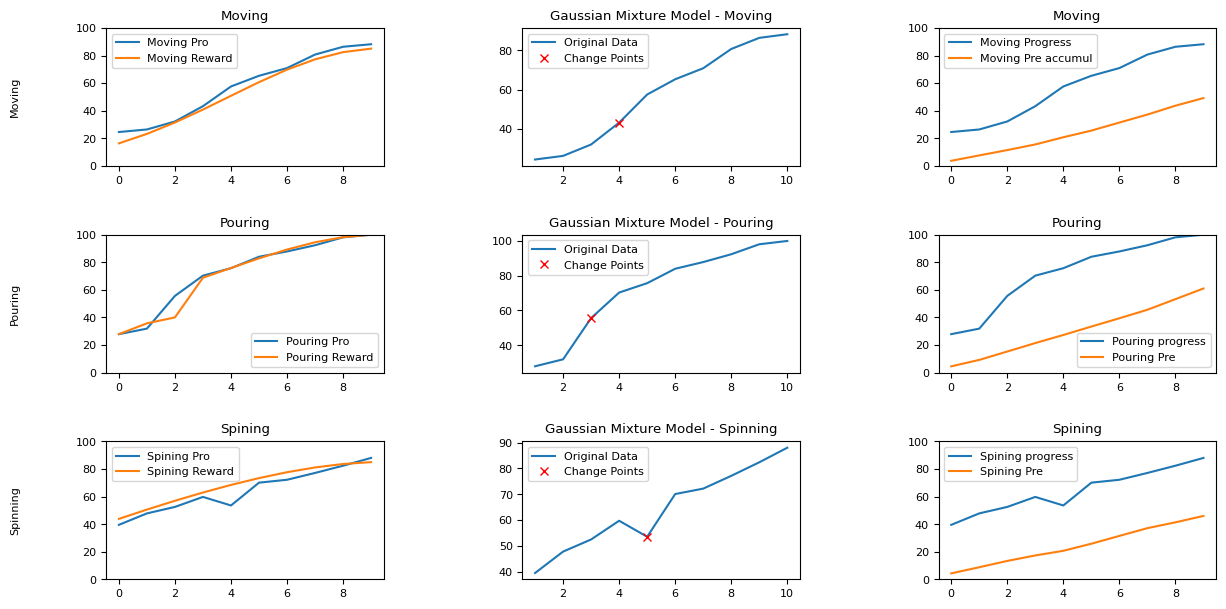

In [29]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
import numpy as np
from sklearn.mixture import GaussianMixture
from scipy.stats import ttest_ind
import pandas as pd

# Define the gridspec
fig_width = 7.16*2  # width in inches, for double column
fig_height = 7.16  # Adjusted height in inches to maintain aspect ratio

fig = plt.figure(figsize=(fig_width, fig_height))
gs = gridspec.GridSpec(3, 3, width_ratios=[1, 1, 1], hspace=0.5, wspace=0.5)

# Font size
font_size = 8
plt.rcParams.update({'font.size': font_size})

# Block 1
ax1 = plt.subplot(gs[0, 0])
ax2 = plt.subplot(gs[1, 0])
ax3 = plt.subplot(gs[2, 0])

# Add labels to each row
ax1.set_ylabel('Moving', fontsize=font_size, rotation=90, labelpad=40)
ax2.set_ylabel('Pouring', fontsize=font_size, rotation=90, labelpad=40)
ax3.set_ylabel('Spinning', fontsize=font_size, rotation=90, labelpad=40)


col_titles = ['Column 1 Title', 'Column 2 Title', 'Column 3 Title']

# Add column titles
for i, title in enumerate(col_titles):
    ax = plt.subplot(gs[0, i])
    ax.set_title(title, fontsize=font_size, y=1.15)

ax1.plot(moving_pro_mean, label='Moving Pro')
ax1.plot(reward_moving, label='Moving Reward')
ax1.set_title('Moving')
ax1.set_ylim(0, 100)
ax1.legend()

ax2.plot(pouring_pro_mean, label='Pouring Pro')
ax2.plot(reward_pouring, label='Pouring Reward')
ax2.set_title('Pouring')
ax2.set_ylim(0, 100)
ax2.legend()

ax3.plot(spining_pro_mean, label='Spining Pro')
ax3.plot(reward_spining, label='Spining Reward')
ax3.set_title('Spining')
ax3.set_ylim(0, 100)
ax3.legend()

# Block 2 (Gaussian Mixture Model)
for i, data in enumerate([moving_pro_mean, pouring_pro_mean, spining_pro_mean]):
    ax = plt.subplot(gs[i, 1])
    gmm = GaussianMixture(n_components=2).fit(data.reshape(-1, 1))
    components = gmm.predict(data.reshape(-1, 1))
    change_points = np.where(np.diff(components))[0]
    ax.plot(time_step, data, label='Original Data')
    ax.plot(time_step[change_points], data[change_points], 'rx', label='Change Points')
    ax.set_title(f'Gaussian Mixture Model - {dataset_names[i]}')
    ax.legend()

# Block 3
ax4 = plt.subplot(gs[0, 2])
ax5 = plt.subplot(gs[1, 2])
ax6 = plt.subplot(gs[2, 2])

ax4.plot(moving_pro_mean, label='Moving Progress')
ax4.plot(moving_pre_accumulate, label='Moving Pre accumul')
ax4.set_title('Moving')
ax4.set_ylim(0, 100)
ax4.legend()

ax5.plot(pouring_pro_mean, label='Pouring progress')
ax5.plot(pouring_pre_accumulate, label='Pouring Pre')
ax5.set_title('Pouring')
ax5.set_ylim(0, 100)
ax5.legend()

ax6.plot(spining_pro_mean, label='Spining progress')
ax6.plot(spining_pre_accumulate, label='Spining Pre')
ax6.set_title('Spining')
ax6.set_ylim(0, 100)
ax6.legend()


plt.tight_layout()
plt.savefig("plot_high_res.png", dpi=300, bbox_inches='tight')
plt.show()


C:\Users\Hang Yu\AppData\Local\Temp\ipykernel_22540\1230126749.py:106: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


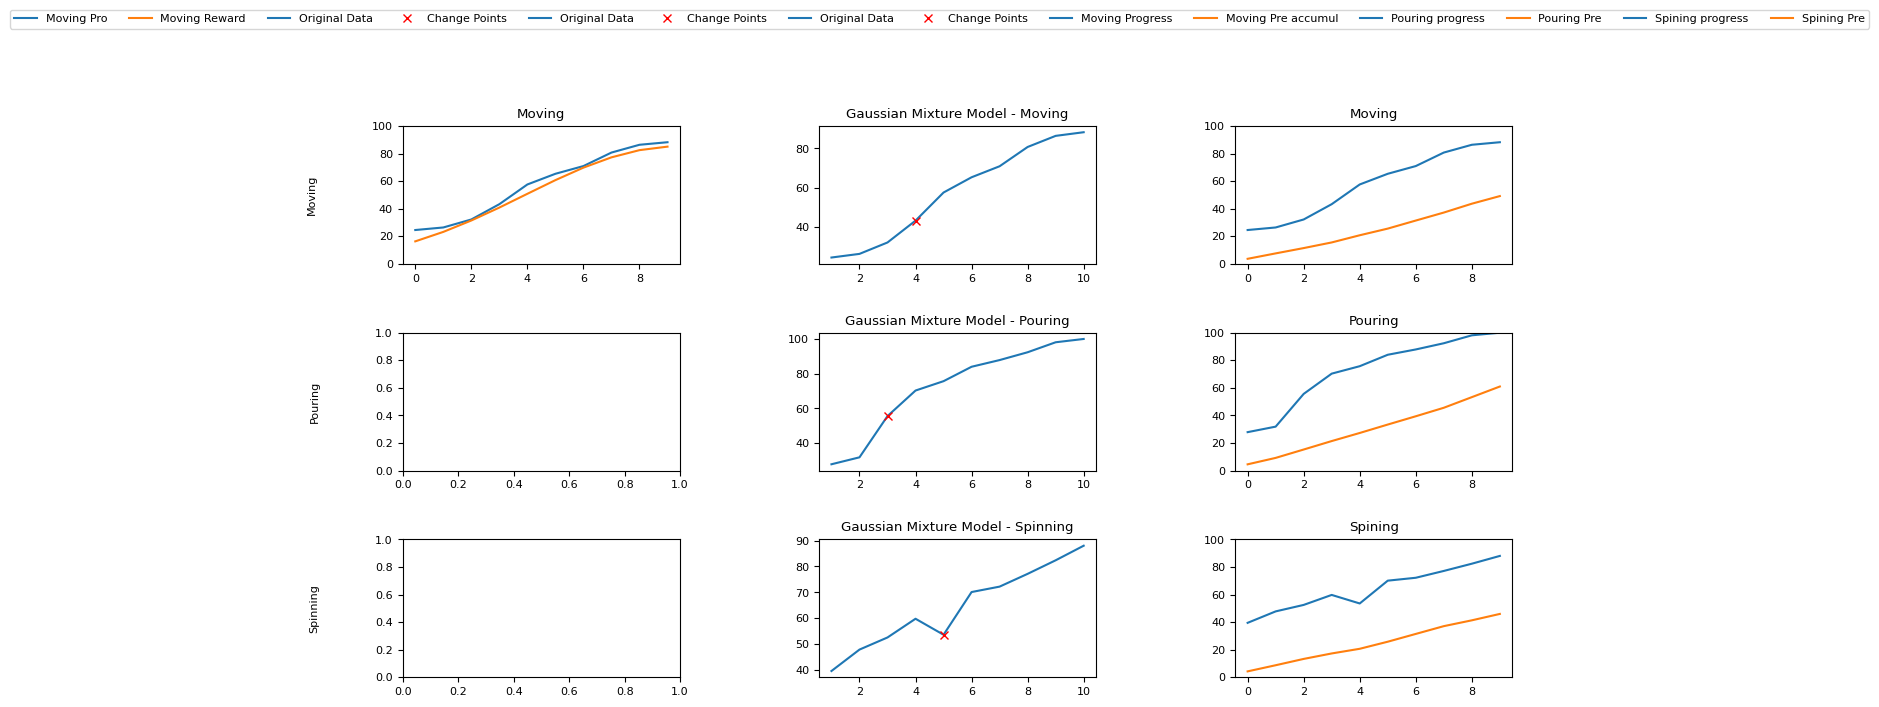

In [30]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
import numpy as np
from sklearn.mixture import GaussianMixture
from scipy.stats import ttest_ind
import pandas as pd

# Define the gridspec
fig_width = 7.16*2  # width in inches, for double column
fig_height = 7.16  # Adjusted height in inches to maintain aspect ratio

fig = plt.figure(figsize=(fig_width, fig_height))
gs = gridspec.GridSpec(3, 3, width_ratios=[1, 1, 1], hspace=0.5, wspace=0.5)

# Font size
font_size = 8
plt.rcParams.update({'font.size': font_size})

# Collect handles and labels for legend
handles, labels = [], []

# Block 1
ax1 = plt.subplot(gs[0, 0])
ax2 = plt.subplot(gs[1, 0])
ax3 = plt.subplot(gs[2, 0])

# Add labels to each row
ax1.set_ylabel('Moving', fontsize=font_size, rotation=90, labelpad=40)
ax2.set_ylabel('Pouring', fontsize=font_size, rotation=90, labelpad=40)
ax3.set_ylabel('Spinning', fontsize=font_size, rotation=90, labelpad=40)

# Add column titles
col_titles = ['Column 1 Title', 'Column 2 Title', 'Column 3 Title']
for i, title in enumerate(col_titles):
    ax = plt.subplot(gs[0, i])
    ax.set_title(title, fontsize=font_size, y=1.15)

# Plot data and collect handles and labels for legend
lines = ax1.plot(moving_pro_mean, label='Moving Pro')
handles.extend(lines)
labels.extend([line.get_label() for line in lines])

lines = ax1.plot(reward_moving, label='Moving Reward')
handles.extend(lines)
labels.extend([line.get_label() for line in lines])

ax1.set_title('Moving')
ax1.set_ylim(0, 100)

# Block 2 (Gaussian Mixture Model)
for i, data in enumerate([moving_pro_mean, pouring_pro_mean, spining_pro_mean]):
    ax = plt.subplot(gs[i, 1])
    gmm = GaussianMixture(n_components=2).fit(data.reshape(-1, 1))
    components = gmm.predict(data.reshape(-1, 1))
    change_points = np.where(np.diff(components))[0]
    lines = ax.plot(time_step, data, label='Original Data')
    handles.extend(lines)
    labels.extend([line.get_label() for line in lines])
    lines = ax.plot(time_step[change_points], data[change_points], 'rx', label='Change Points')
    handles.extend(lines)
    labels.extend([line.get_label() for line in lines])
    ax.set_title(f'Gaussian Mixture Model - {dataset_names[i]}')

# Block 3
ax4 = plt.subplot(gs[0, 2])
ax5 = plt.subplot(gs[1, 2])
ax6 = plt.subplot(gs[2, 2])

lines = ax4.plot(moving_pro_mean, label='Moving Progress')
handles.extend(lines)
labels.extend([line.get_label() for line in lines])

lines = ax4.plot(moving_pre_accumulate, label='Moving Pre accumul')
handles.extend(lines)
labels.extend([line.get_label() for line in lines])

ax4.set_title('Moving')
ax4.set_ylim(0, 100)

lines = ax5.plot(pouring_pro_mean, label='Pouring progress')
handles.extend(lines)
labels.extend([line.get_label() for line in lines])

lines = ax5.plot(pouring_pre_accumulate, label='Pouring Pre')
handles.extend(lines)
labels.extend([line.get_label() for line in lines])

ax5.set_title('Pouring')
ax5.set_ylim(0, 100)

lines = ax6.plot(spining_pro_mean, label='Spining progress')
handles.extend(lines)
labels.extend([line.get_label() for line in lines])

lines = ax6.plot(spining_pre_accumulate, label='Spining Pre')
handles.extend(lines)
labels.extend([line.get_label() for line in lines])

ax6.set_title('Spining')
ax6.set_ylim(0, 100)

# Add a single legend at the top of the figure
fig.legend(handles, labels, loc='upper center', ncol=len(labels), fontsize=font_size, bbox_to_anchor=(0.5, 1.05))

plt.tight_layout()
plt.savefig("plot_high_res.png", dpi=300, bbox_inches='tight')
plt.show()
